In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("all video from Indonesia Belajar.csv", sep=";")
print(df.shape)
df.head()

(501, 8)


,id,title,description,date_published,tags,duration,view,like
0,qgD4hlioVWA,Rebase Fedora Silverblue | Fedora Kinoite | So...,Salam Indonesia Belajar!!!\n\nRebase Immutable...,2022-05-12T09:00:53Z,"['fedora kinoite', 'fedora silverblue', 'fedor...",PT29M13S,317,20
1,LW1YtdZKeDA,CSD 16 | Tips Belajar Programming dan Belajar ...,"Hallo sobat Indonesia Belajar, jumpa lagi deng...",2022-05-07T02:00:12Z,"['catatan seorang dosen', 'indonesia belajar',...",PT16M52S,1779,104
2,G8ULufXAUvE,TS 08 | Mengenal Decomposition | De-Seasonalis...,Salam Indonesia Belajar!!! \n\nMengenal Decomp...,2022-04-25T09:00:11Z,"['time series', 'data deret waktu', 'belajar t...",PT31M35S,1202,17
3,IhW5vTjo9LE,CSD 15 | Sidang Skripsi Online di masa Pandemi...,"Hallo sobat Indonesia Belajar, jumpa lagi deng...",2022-04-21T09:00:13Z,"['sidang skripsi', 'sidang online', 'sidang sk...",PT9M12S,615,34
4,kb1EKafVl1w,Seputar Blockchain bersama Nur Arifin Akbar | ...,Bincang santai seputar Blockchain bersama Nur ...,2022-04-18T09:00:22Z,"['nur arifin akbar', 'nur arifin blockchain', ...",PT42M33S,682,33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              501 non-null    object
 1   title           501 non-null    object
 2   description     500 non-null    object
 3   date_published  501 non-null    object
 4   tags            499 non-null    object
 5   duration        501 non-null    object
 6   view            501 non-null    int64 
 7   like            501 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


# Data Cleaning

## Missing Value

<AxesSubplot:>

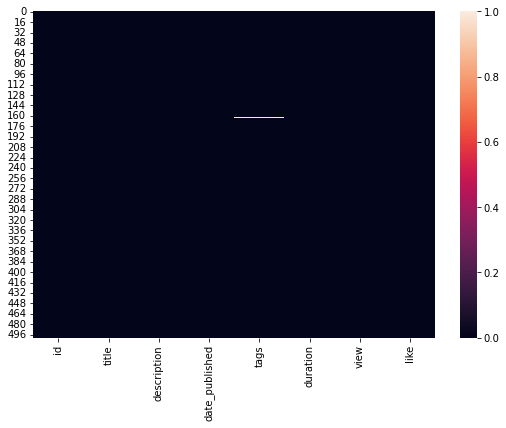

In [53]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()

id                0
title             0
description       1
date_published    0
tags              2
duration          0
view              0
like              0
dtype: int64

In [54]:
df.dropna(inplace=True)

<AxesSubplot:>

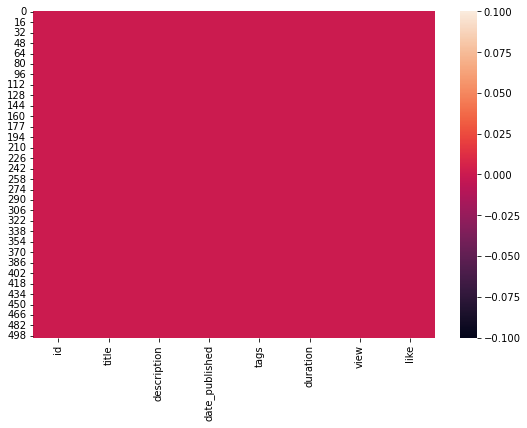

In [55]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.isnull())

# Preprocessing

In [56]:
from dateutil import parser
import isodate
import matplotlib.ticker as ticker

In [57]:
# Use this
# df['publishedAt'] = df['date_published'].apply(lambda x: parser.parse(x))
# Or this
df.date_published = pd.to_datetime(df.date_published)

df['publishedDayName'] = df['date_published'].apply(lambda x: x.strftime("%A"))
df['durationSecs'] = df["duration"].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

In [58]:
df.head(1)

,id,title,description,date_published,tags,duration,view,like,publishedDayName,durationSecs
0,qgD4hlioVWA,Rebase Fedora Silverblue | Fedora Kinoite | So...,Salam Indonesia Belajar!!!\n\nRebase Immutable...,2022-05-12 09:00:53+00:00,"['fedora kinoite', 'fedora silverblue', 'fedor...",PT29M13S,317,20,Thursday,1753.0


# Data Visualization

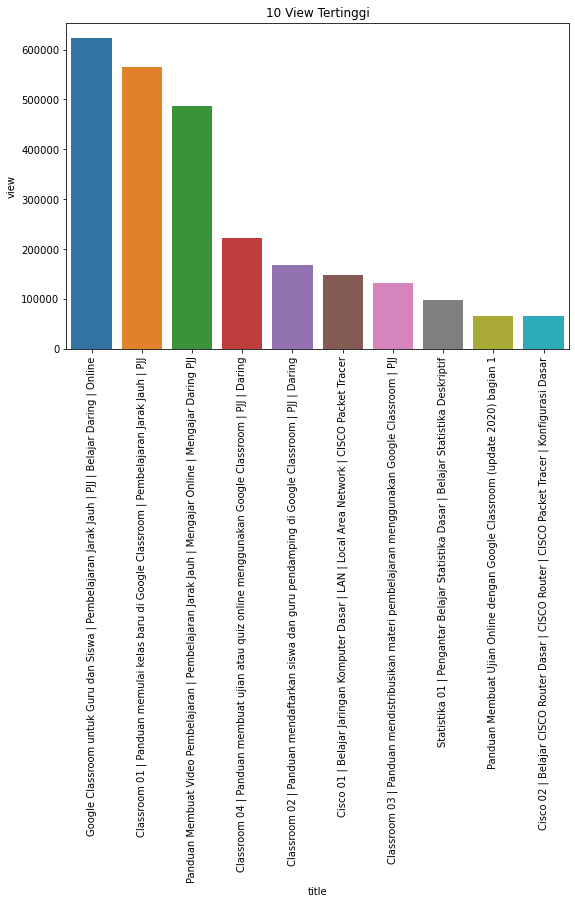

In [60]:
# best video views
fig = plt.figure(figsize=(9,6))
ax = sns.barplot(x='title', y='view', data=df.sort_values('view', ascending=False)[0:10])
ax.set_title("10 View Tertinggi")
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'View Distribution')

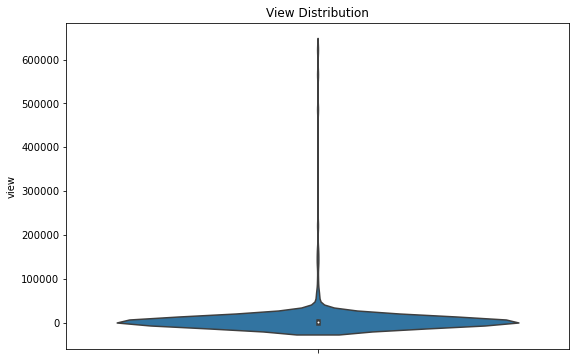

In [65]:
plt.figure(figsize=(9,6))
ax = sns.violinplot(y=df['view'], data=df)
ax.set_title("View Distribution")

Text(0.5, 1.0, 'View and Likes Correlation')

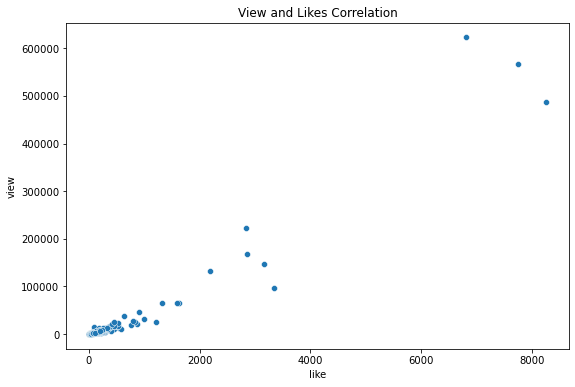

In [66]:
# view and likes  correlation
plt.figure(figsize=(9,6))
ax = sns.scatterplot(data=df, x='like', y = 'view')
ax.set_title("View and Likes Correlation")

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

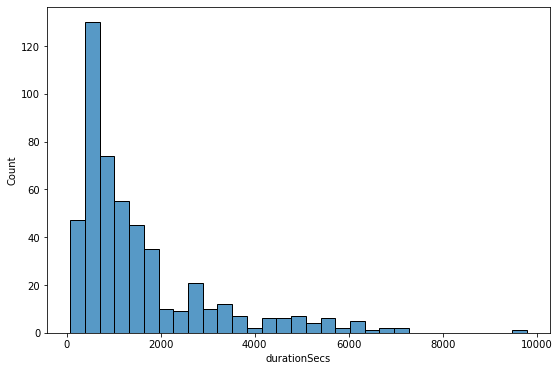

In [67]:
# Duration video distribution
plt.figure(figsize=(9,6))
sns.histplot(x="durationSecs", data=df)

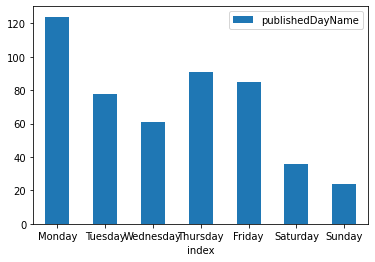

In [78]:
day_df = pd.DataFrame(df["publishedDayName"].value_counts())
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x="index", y="publishedDayName", rot=0)